In this notebook I will try to create a composite map from our canny arrays

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc
import cv2
import datetime
import xarray as xr
import os

%matplotlib inline

#### Importação dos dados de Atlantic-Iberian Biscay Irish- Ocean Physics Reanalysis

Através da command line eu importei uma base de dados relativa a 2019 dos valores de SST de um dado programa do Copernicus. Trata-se de um ficheiro .nc (netCDF)

No entanto no futuro eu vou querer que o meu programa faça download diretamente dos dados num python script

In [2]:
current_path = os.getcwd()
current_path

'/home/luisfigueiredo/JUNO/notebooks'

In [3]:
from pathlib import Path

data_folder = os.path.join(current_path,"../data")
data_folder

'/home/luisfigueiredo/JUNO/notebooks/../data'

In [4]:
nc_path = os.path.join(data_folder, "IBI-2019.nc")
ds = nc.Dataset(nc_path)
data = xr.load_dataset(nc_path)

In [5]:
print(ds)     # informações relativas ao ficheiro netCDF

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    source: CMEMS IBI-MFC
    institution: Puertos del Estado (PdE) - Mercator-Ocean (MO)
    references: http://marine.copernicus.eu
    title: CMEMS IBI REANALYSIS: DAILY PHYSICAL PRODUCTS 
    easting: longitude
    northing: latitude
    domain_name: IBI12
    FROM_ORIGINAL_FILE__field_type: mean
    field_date: 20191224
    FROM_ORIGINAL_FILE__longitude_min: -19.f
    FROM_ORIGINAL_FILE__longitude_max: 5.f
    FROM_ORIGINAL_FILE__latitude_min: 26.f
    FROM_ORIGINAL_FILE__latitude_max: 56.f
    z_min: 0.50576f
    z_max: 5698.061f
    contact: mailto: servicedesk.cmems@mercator-ocean.eu
    bulletin_date: 2020-12-01
    bulletin_type: Reanalysis
    _CoordSysBuilder: ucar.nc2.dataset.conv.CF1Convention
    comment: 
    history: Data extracted from dataset http://localhost:8080/thredds/dodsC/cmems_mod_ibi_phy_my_0.083deg-3D_P1D-m
    dimensions(sizes): time(358)

In [6]:
#Converter o ficheiro netCDF para uma dataframe
datadf = data.to_dataframe()
datadf2 = datadf.reset_index()

In [7]:
datadf2 = datadf2.drop(['depth'], axis=1)     #dropar coluna 'depth' (não é necessária pq é sempre igual)
datadf2    #os dados .nc estão agora no formato de uma dataframe

,latitude,longitude,time,thetao
0,35.0,-19.0,2019-01-01 12:00:00,17.766001
1,35.0,-19.0,2019-01-02 12:00:00,17.969000
2,35.0,-19.0,2019-01-03 12:00:00,18.152000
3,35.0,-19.0,2019-01-04 12:00:00,18.254002
4,35.0,-19.0,2019-01-05 12:00:00,18.211000
...,...,...,...,...
7320737,45.0,-5.0,2019-12-20 12:00:00,13.619000
7320738,45.0,-5.0,2019-12-21 12:00:00,13.559000
7320739,45.0,-5.0,2019-12-22 12:00:00,13.458000
7320740,45.0,-5.0,2019-12-23 12:00:00,13.400000


In [8]:
datadf2 = datadf2[['time', 'latitude', 'longitude', 'thetao']]    #reorganizar as colunas da dataframe
datadf2

,time,latitude,longitude,thetao
0,2019-01-01 12:00:00,35.0,-19.0,17.766001
1,2019-01-02 12:00:00,35.0,-19.0,17.969000
2,2019-01-03 12:00:00,35.0,-19.0,18.152000
3,2019-01-04 12:00:00,35.0,-19.0,18.254002
4,2019-01-05 12:00:00,35.0,-19.0,18.211000
...,...,...,...,...
7320737,2019-12-20 12:00:00,45.0,-5.0,13.619000
7320738,2019-12-21 12:00:00,45.0,-5.0,13.559000
7320739,2019-12-22 12:00:00,45.0,-5.0,13.458000
7320740,2019-12-23 12:00:00,45.0,-5.0,13.400000


In [ ]:
#### Começar por tentar fazer um composite map com 2 imagens (canny arrays)

In [9]:
#Df com dados relativos a um dia específico (neste caso 25 Setembro)
dia25 = datadf2[datadf2['time'] == '2019-09-25 12:00:00']
dia25

,time,latitude,longitude,thetao
267,2019-09-25 12:00:00,35.0,-19.000000,22.527000
625,2019-09-25 12:00:00,35.0,-18.916666,22.516001
983,2019-09-25 12:00:00,35.0,-18.833334,22.648001
1341,2019-09-25 12:00:00,35.0,-18.750000,22.809002
1699,2019-09-25 12:00:00,35.0,-18.666666,22.910000
...,...,...,...,...
7319219,2019-09-25 12:00:00,45.0,-5.333334,19.063999
7319577,2019-09-25 12:00:00,45.0,-5.250000,19.021999
7319935,2019-09-25 12:00:00,45.0,-5.166667,18.996000
7320293,2019-09-25 12:00:00,45.0,-5.083334,19.000999


In [10]:
#Df com dados relativos a um dia específico (neste caso 25 Setembro)
dia26 = datadf2[datadf2['time'] == '2019-09-26 12:00:00']
dia26

,time,latitude,longitude,thetao
268,2019-09-26 12:00:00,35.0,-19.000000,22.477001
626,2019-09-26 12:00:00,35.0,-18.916666,22.535000
984,2019-09-26 12:00:00,35.0,-18.833334,22.711000
1342,2019-09-26 12:00:00,35.0,-18.750000,22.859001
1700,2019-09-26 12:00:00,35.0,-18.666666,22.924999
...,...,...,...,...
7319220,2019-09-26 12:00:00,45.0,-5.333334,18.885000
7319578,2019-09-26 12:00:00,45.0,-5.250000,18.834999
7319936,2019-09-26 12:00:00,45.0,-5.166667,18.810001
7320294,2019-09-26 12:00:00,45.0,-5.083334,18.831001


In [11]:
def canny_creation(df, Tmax):
    
    """
    Função que pega numa df com temperaturas relativas a um certo dia e retorna a matriz obtida através do Canny
    """
    
    #Pegar na df dum dia e converte-la num np array com os valores de Temperatura para os valores de long e lati
    Temp = df.pivot_table(index='longitude', columns='latitude', values='thetao').T.values
    
    #Converter os valores de temperatura no formato uint8 com valores entre 0-255
    Temp_day = ((Temp - np.nanmin(Temp)) * (1/(np.nanmax(Temp) - np.nanmin(Temp)) * 255)).astype('uint8')

    Temp_day = np.flipud(Temp_day)   #flipud -> Reverse the order of elements along axis 0 (up/down).
    
    #apply the canny algorithm and plot the image with the edges
    canny = cv2.Canny(Temp_day, Tmax/2, Tmax, L2gradient=False, apertureSize=3)
    
    return canny

In [12]:
canny_25 = canny_creation(dia25, 180)
canny_25

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
canny_26 = canny_creation(dia26, 180)
canny_26.shape

(121, 169)

In [14]:
fp = np.zeros((121,169)).astype('uint8')
fp

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
fp = fp + canny_25 + canny_26

In [16]:
fp.max()

255

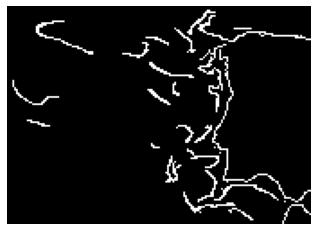

In [17]:
plt.imshow(fp, 'gray')    #'gray'-> parametro para por a preto e branco
plt.axis('off');

A fazer: 
    criar uma função que me divida a dataframe original conforme os dias e depois lhe aplique a função canny_creation para que eu depois consiga construir a matriz de probability front

#### Código para Dividir a dataframe consoante a data

In [30]:
datadf2

,time,latitude,longitude,thetao
0,2019-01-01 12:00:00,35.0,-19.0,17.766001
1,2019-01-02 12:00:00,35.0,-19.0,17.969000
2,2019-01-03 12:00:00,35.0,-19.0,18.152000
3,2019-01-04 12:00:00,35.0,-19.0,18.254002
4,2019-01-05 12:00:00,35.0,-19.0,18.211000
...,...,...,...,...
7320737,2019-12-20 12:00:00,45.0,-5.0,13.619000
7320738,2019-12-21 12:00:00,45.0,-5.0,13.559000
7320739,2019-12-22 12:00:00,45.0,-5.0,13.458000
7320740,2019-12-23 12:00:00,45.0,-5.0,13.400000


In [36]:
#create unique list of names
UniqueNames = datadf2['time'].unique()

#create a data frame dictionary to store your data frames
df = {elem : pd.DataFrame for elem in UniqueNames}

for key in df.keys():
    df[key] = datadf2[:][datadf2['time'] == key]

In [37]:
df['2019-05-20 12:00:00']

,time,latitude,longitude,thetao
139,2019-05-20 12:00:00,35.0,-19.000000,19.586000
497,2019-05-20 12:00:00,35.0,-18.916666,19.559000
855,2019-05-20 12:00:00,35.0,-18.833334,19.527000
1213,2019-05-20 12:00:00,35.0,-18.750000,19.492001
1571,2019-05-20 12:00:00,35.0,-18.666666,19.455002
...,...,...,...,...
7319091,2019-05-20 12:00:00,45.0,-5.333334,14.401000
7319449,2019-05-20 12:00:00,45.0,-5.250000,14.430000
7319807,2019-05-20 12:00:00,45.0,-5.166667,14.457001
7320165,2019-05-20 12:00:00,45.0,-5.083334,14.469000


In [50]:
UniqueNames

array(['2019-01-01 12:00:00', '2019-01-02 12:00:00',
       '2019-01-03 12:00:00', '2019-01-04 12:00:00',
       '2019-01-05 12:00:00', '2019-01-06 12:00:00',
       '2019-01-07 12:00:00', '2019-01-08 12:00:00',
       '2019-01-09 12:00:00', '2019-01-10 12:00:00',
       '2019-01-11 12:00:00', '2019-01-12 12:00:00',
       '2019-01-13 12:00:00', '2019-01-14 12:00:00',
       '2019-01-15 12:00:00', '2019-01-16 12:00:00',
       '2019-01-17 12:00:00', '2019-01-18 12:00:00',
       '2019-01-19 12:00:00', '2019-01-20 12:00:00',
       '2019-01-21 12:00:00', '2019-01-22 12:00:00',
       '2019-01-23 12:00:00', '2019-01-24 12:00:00',
       '2019-01-25 12:00:00', '2019-01-26 12:00:00',
       '2019-01-27 12:00:00', '2019-01-28 12:00:00',
       '2019-01-29 12:00:00', '2019-01-30 12:00:00',
       '2019-01-31 12:00:00', '2019-02-01 12:00:00',
       '2019-02-02 12:00:00', '2019-02-03 12:00:00',
       '2019-02-04 12:00:00', '2019-02-05 12:00:00',
       '2019-02-06 12:00:00', '2019-02-07 12:0

In [52]:
September = UniqueNames[(UniqueNames>'2019-09-01 12:00:00') & (UniqueNames <= '2019-09-30 12:00:00')]
September

array(['2019-09-02 12:00:00', '2019-09-03 12:00:00',
       '2019-09-04 12:00:00', '2019-09-05 12:00:00',
       '2019-09-06 12:00:00', '2019-09-07 12:00:00',
       '2019-09-08 12:00:00', '2019-09-09 12:00:00',
       '2019-09-10 12:00:00', '2019-09-11 12:00:00',
       '2019-09-12 12:00:00', '2019-09-13 12:00:00',
       '2019-09-14 12:00:00', '2019-09-15 12:00:00',
       '2019-09-16 12:00:00', '2019-09-17 12:00:00',
       '2019-09-18 12:00:00', '2019-09-19 12:00:00',
       '2019-09-20 12:00:00', '2019-09-21 12:00:00',
       '2019-09-22 12:00:00', '2019-09-23 12:00:00',
       '2019-09-24 12:00:00', '2019-09-25 12:00:00',
       '2019-09-26 12:00:00', '2019-09-27 12:00:00',
       '2019-09-28 12:00:00', '2019-09-29 12:00:00',
       '2019-09-30 12:00:00'], dtype=object)

In [55]:
for days in September:
    df[days]

In [57]:
df['2019-09-06 12:00:00']

,time,latitude,longitude,thetao
248,2019-09-06 12:00:00,35.0,-19.000000,23.199001
606,2019-09-06 12:00:00,35.0,-18.916666,23.000000
964,2019-09-06 12:00:00,35.0,-18.833334,22.867001
1322,2019-09-06 12:00:00,35.0,-18.750000,22.855000
1680,2019-09-06 12:00:00,35.0,-18.666666,22.914001
...,...,...,...,...
7319200,2019-09-06 12:00:00,45.0,-5.333334,20.224001
7319558,2019-09-06 12:00:00,45.0,-5.250000,20.194000
7319916,2019-09-06 12:00:00,45.0,-5.166667,20.152000
7320274,2019-09-06 12:00:00,45.0,-5.083334,20.101002


tenho varias dataframes para cada dia de setembro. Agora tenho de lhes aplicar a função canny creation para obter o array do canny para cada dia de setembro

In [81]:
#Crio um array canny com as dimensões (121, 169) apenas com zeros. 
#Depois para cada dia aplico a função canny_creation e somo esses valores ao array canny

canny = np.zeros((121,169))
for days in September:
    canny = canny + canny_creation(df[days], 180)

In [84]:
# tenho de dividir por este valor pois Setembro tem 30 dias e o máximo valor do canny é 255 (intensidade do pixel)
canny = canny/(30*255)     

In [99]:
canny

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(array([[121.,   0.,   0., ...,   0.,   0.,   0.],
        [121.,   0.,   0., ...,   0.,   0.,   0.],
        [121.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [114.,   2.,   0., ...,   0.,   0.,   4.],
        [113.,   4.,   0., ...,   0.,   1.,   2.],
        [113.,   3.,   0., ...,   0.,   0.,   2.]]),
 array([0.        , 0.09666667, 0.19333333, 0.29      , 0.38666667,
        0.48333333, 0.58      , 0.67666667, 0.77333333, 0.87      ,
        0.96666667]),
 <a list of 169 Lists of Patches objects>)

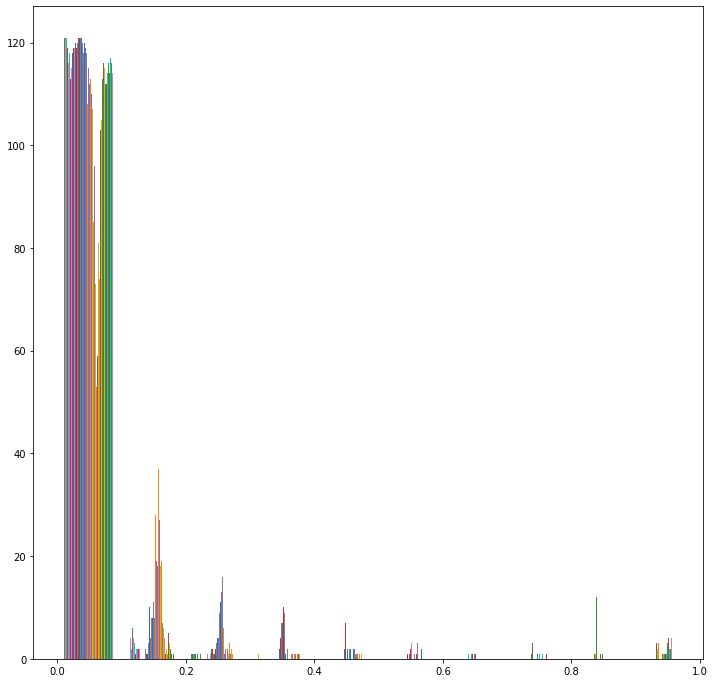

In [102]:
plt.hist(canny)

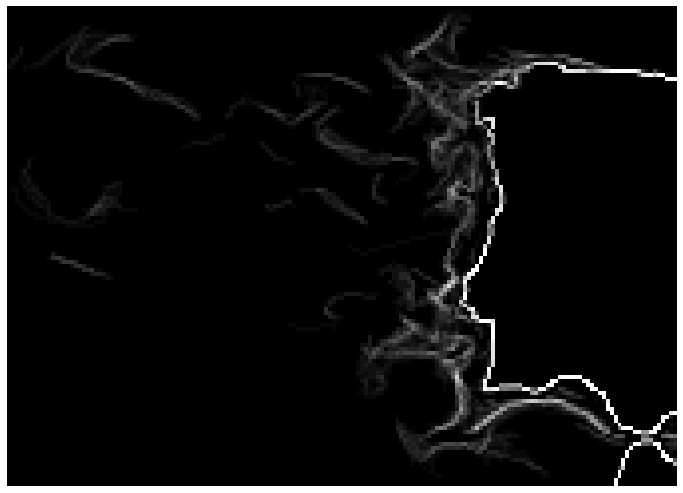

In [95]:
plt.rcParams["figure.figsize"] = 12,12
plt.imshow(canny, 'gray')    #'gray'-> parametro para por a preto e branco
plt.axis('off');
